Asunto: Taller 4 (Preprocesamiento de datos)

Autor: Jheison René Gutierrez Gómez

Correo: jheison.gutierrez01@usa.edu.co



# Taller preprocesamiento de datos

Este ejercicio tiene como finalidad implementar un modelo de regresión lineal utilizando el conjunto de datos diamonds.csv, citado en el capítulo 8 del libro Grokking Artificial Intelligence Algorithms. El objetivo principal consiste en construir un modelo capaz de predecir el precio de un diamante a partir de sus atributos físicos (como peso en quilates, dimensiones y profundidad) y cualitativos (como corte, color y claridad). Esta actividad permite aplicar técnicas fundamentales de preprocesamiento y modelado supervisado, facilitando la comprensión del comportamiento de los algoritmos de regresión en contextos reales.



# Metodología de resolución
La ejecución del presente ejercicio se llevará a cabo mediante una secuencia de etapas estructuradas. En primera instancia, se realizará una exploración preliminar del conjunto de datos diamonds.csv, con el fin de comprender su composición, variables y posibles inconsistencias. Posteriormente, se aplicarán técnicas de preprocesamiento orientadas a la limpieza, transformación y adecuación de los datos para su uso en modelos de aprendizaje automático. Una vez preparados los datos, se construirá un pipeline que integre todo el flujo de trabajo, desde la ingesta y transformación hasta la implementación del modelo de regresión lineal. Finalmente, se evaluará el desempeño del modelo utilizando métricas apropiadas, y se presentarán las conclusiones derivadas del análisis cuantitativo y cualitativo de los resultados obtenidos.


# Descripción del conjunto de datos

El conjunto de datos diamonds.csv está compuesto por 10 variables que describen las propiedades físicas, cualitativas y económicas de una muestra de diamantes. Estas características permiten analizar la relación entre atributos específicos y el precio de cada pieza. A continuación se detallan las variables incluidas:
- Carat: Peso del diamante expresado en quilates (1 quilate = 200 mg).
- Cut: Calidad del corte del diamante, categorizada en cinco niveles: Fair (regular), Good (buena), Very Good (muy buena), Premium y Ideal.
- Color: Escala de color que va de D a J, donde D representa diamantes incoloros (mayor calidad) y J indica tonalidades más turbias.
- Clarity: Grado de pureza del diamante, determinado por la presencia de inclusiones o imperfecciones. Las categorías incluyen: FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3, en orden descendente de claridad.
- Depth: Porcentaje de profundidad del diamante, calculado desde la culata (culet) hasta la tabla (table). Este valor influye en la estética y el brillo del diamante.
- Table: Porcentaje que representa el tamaño de la tabla (parte superior plana) en relación con la dimensión X del diamante.
- x, y, z: Dimensiones físicas del diamante en milímetros, correspondientes al largo, ancho y profundidad respectivamente.
- Price: Valor comercial del diamante expresado en unidades monetarias.


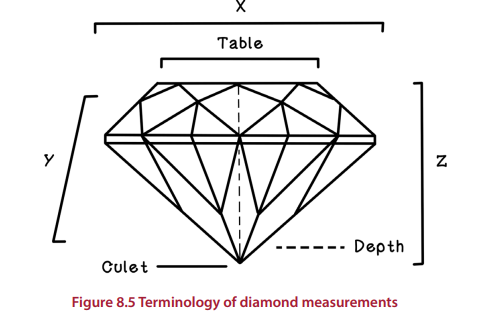

Primero, se deben cargar las librerías que se utilizarán:

In [1]:
import numpy as np # biblioteca utilizada para la computación numérica
import pandas as pd # Biblioteca utilizada para análisis de datos
import matplotlib.pyplot as plt # Biblioteca utilizada para graficar datos
import seaborn as sns # Biblioteca utilizada para visualizar datos de manera elegante
import sklearn # Biblioteca utilizada para utilizar algoritmos de machine learning

Se importan los datos, en este caso desde un repositorio de GitHub.

In [2]:
datos=pd.read_csv("https://raw.githubusercontent.com/JRGIQ/Datos_Maestria_IA/refs/heads/main/diamonds.csv")

Creación de un data frame con los datos importados y se visualizan.

In [3]:
df=pd.DataFrame(datos) # Creación de un data frame con los datos importados
display(df) # Visualizar datos

,no,carat,cut,color,clarity,depth,table,price,x size,y size,z size
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Visualizar que tipo de datos contiene el archivo de datos (categóricos o numéricos).

In [4]:
df.info() # Función que permite visualizar alguna información del data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   no       53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   price    53940 non-null  int64  
 8   x size   53940 non-null  float64
 9   y size   53940 non-null  float64
 10  z size   53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# Descripción básica de los datos

Durante la exploración inicial del conjunto de datos diamonds.csv, se identificó una columna denominada no, la cual no posee descripción ni relevancia aparente según el capítulo 8 del libro Grokking Artificial Intelligence Algorithms. Por lo tanto, se considera prescindible y será eliminada en el proceso de preprocesamiento.
El conjunto de datos contiene un total de 53,940 instancias, distribuidas de manera completa entre las variables, sin presencia de valores nulos. Se identifican tres variables categóricas: cut, color y clarity, que representan atributos cualitativos del diamante. Las demás variables corresponden a atributos numéricos, como peso, dimensiones físicas y precio. Esta estructura mixta de datos requiere una codificación adecuada de las variables categóricas para su integración en el modelo de regresión lineal.


#Atributos numéricos

Para obtener una descripción estadística básica de las variables numéricas del conjunto de datos, se puede utilizar el método describe() de la biblioteca pandas. Esta función permite visualizar medidas como la media, desviación estándar, valores mínimos, máximos y percentiles, facilitando la comprensión inicial de la distribución de los datos. La línea de código correspondiente es:


In [5]:
display(df.describe()) # Función que permite visualizar algunos datos estadísticos de las variables numéricas del data frame

,no,carat,depth,table,price,x size,y size,z size
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


La función (describe), permite visualizar algunos datos estadísticos básicos como: media, desviación estándar, valor mínimo, valor máximo y algunos percentiles como el 25 (primer cuartil), 50 (mediana) y 75 (tercer cuartil).

# Estadística descriptiva de las variables. Gráficas (histogramas)

También se pueden visualizar los datos de las variables numéricas graficando un histograma de la siguiente manera.

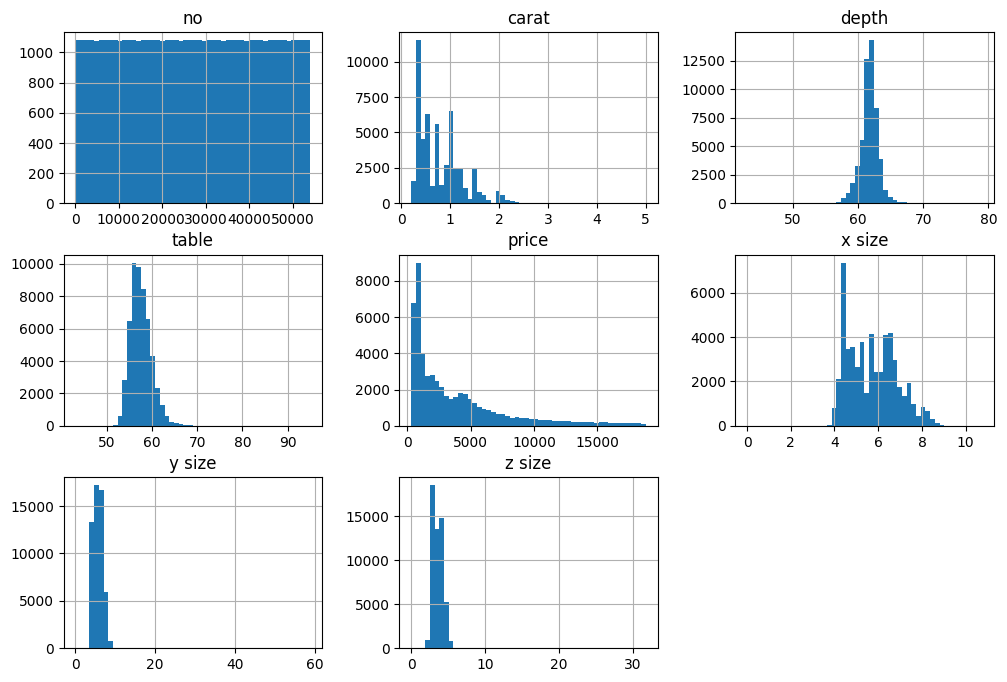

In [6]:
df.hist(bins=50, figsize=(12, 8)) # Función que permite graficar un histograma de las variables numéricas del data frame
plt.show()

Durante el análisis gráfico, se identificó la presencia de una variable denominada 'no', la cual no posee descripción en la fuente bibliográfica ni aporta información significativa al modelo. Su distribución, observada mediante un histograma, no revela patrones útiles ni relación aparente con las demás variables. Por lo tanto, se considera irrelevante y será eliminada del DataFrame para evitar ruido en el proceso de modelado. Esta operación se puede realizar mediante la siguiente instrucción en Python:


In [7]:
df=df.drop(columns=['no']) # Función que permite eliminar de forma permanenete una categoría completa.

Una vez eliminada la columna 'no', se utiliza nuevamente el método info() de pandas para confirmar que dicha variable ya no forma parte del conjunto de datos. Esta función permite visualizar la estructura del DataFrame, incluyendo el número de columnas, tipo de datos y cantidad de valores no nulos por atributo. La línea de código correspondiente es:


In [8]:
df.info() # Función que permite visualizar alguna información del data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x size   53940 non-null  float64
 8   y size   53940 non-null  float64
 9   z size   53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


La ausencia de la columna 'no' en la salida de esta función valida que la operación de eliminación se ha ejecutado correctamente, dejando el conjunto de datos listo para continuar con el preprocesamiento.

# Análisis exploratorio (Matriz de correlaciones)

Con el fin de identificar posibles relaciones lineales entre las variables numéricas del conjunto de datos, se construirá una matriz de correlaciones utilizando el método corr() de pandas. Este análisis permite detectar asociaciones positivas o negativas entre atributos como peso, dimensiones y precio, lo cual resulta útil para comprender la estructura interna del conjunto de datos y anticipar el comportamiento del modelo de regresión.
Dado que la función corr() solo opera sobre variables de tipo numérico, se procede a separar las variables categóricas en una copia del DataFrame, denominada gf, para su análisis posterior. El siguiente fragmento de código ilustra el procedimiento:


In [9]:
gf=df # Genera una copia del data frame actual sin modificaciones para posteriormente utilizarla para el análisis de las variables categóricas

df=df.drop(columns=['cut']) # Elimina la variable 'cut' del data frame
df=df.drop(columns=['color']) # Elimina la variable 'color' del data frame
df=df.drop(columns=['clarity']) # Elimina la variable 'clarity' del data frame

# Las variables eliminadas anteriormente son categóricas (se eliminan para poder representar la matriz de correlaciones)

corr_matrix = df.corr() # Se realiza la matriz de correlación

display(corr_matrix["price"].sort_values(ascending=False)) # Imprime en pantalla la matriz de correlación de todas las variables respecto a la variable 'price' (precio del diamante)

,price
price,1.000000
carat,0.921591
x size,0.884435
y size,0.865421
z size,0.861249
table,0.127134
depth,-0.010647


### Interpretación de la matriz de correlación

La matriz de correlación permite cuantificar la relación lineal entre las variables numéricas del conjunto de datos y la variable objetivo 'price'. Los coeficientes obtenidos oscilan entre -1 y 1, donde valores cercanos a ±1 indican una fuerte relación lineal, y valores próximos a 0 sugieren ausencia de correlación lineal.
Según los resultados obtenidos:
- La variable 'carat' (peso del diamante) presenta el coeficiente de correlación más alto con el precio, lo que indica una fuerte relación directa.
- Las dimensiones físicas 'x', 'y' y 'z' también muestran correlaciones positivas significativas con el precio, aunque en menor magnitud que 'carat'.
- En contraste, las variables 'table' y 'depth' exhiben coeficientes de correlación cercanos a cero, lo que sugiere que no tienen una relación lineal relevante con el precio del diamante.
Dado que 'table' y 'depth' no aportan información útil para la predicción del precio bajo un enfoque lineal, se excluirán del modelo de regresión para evitar introducir ruido y mejorar la eficiencia del entrenamiento.



In [10]:
df=df.drop(columns=['table']) # Elimina la variable 'table' del data frame
df=df.drop(columns=['depth']) # Elimina la variable 'depth' del data frame

# Combinación de atributos

Con el objetivo de mejorar la capacidad predictiva del modelo y aumentar el coeficiente de correlación con la variable 'price', se aplicará una técnica conocida como combinación de atributos. Esta estrategia consiste en generar nuevas variables a partir de atributos existentes, con el fin de capturar relaciones más significativas entre los datos.
En este caso, se asume que el diamante posee una forma tridimensional definida por sus dimensiones físicas x, y y z, por lo que se propone calcular un nuevo atributo denominado 'volumen', definido como el producto de dichas dimensiones. Se espera que esta nueva variable presente una correlación más fuerte con el precio que las dimensiones individuales por separado.
El siguiente fragmento de código ilustra el procedimiento para generar el atributo 'volumen':


In [11]:
df['volumen']=df['x size']*df['y size']*df['z size'] # Combina tres variables (x size, y size, z size) para generar una variable nueva (volumen)
corr_matrix = df.corr() # Genera la matriz de correlación
display(corr_matrix["price"].sort_values(ascending=False)) # Visualiza la matriz de correlación

,price
price,1.000000
carat,0.921591
volumen,0.902385
x size,0.884435
y size,0.865421
z size,0.861249


## Evaluación del nuevo atributo 'volumen'
Tras la incorporación del atributo 'volumen', definido como el producto de las dimensiones físicas x, y y z, se actualizó la matriz de correlación para evaluar su relación con la variable dependiente 'price'. Los resultados muestran que 'volumen' presenta un coeficiente de correlación superior al de cada dimensión individual, lo que confirma que la combinación de atributos ha capturado mejor la relación lineal con el precio del diamante.
Esta mejora justifica la sustitución de las variables x, y y z por el nuevo atributo 'volumen', simplificando el modelo y conservando la información relevante. En consecuencia, se eliminarán las dimensiones individuales del DataFrame, conservando únicamente las variables 'carat' y 'volumen', ya que son las que presentan mayor capacidad explicativa respecto al precio del diamante.


In [12]:
df=df.drop(columns=['x size']) # Elimina la variable 'x size' del data frame
df=df.drop(columns=['y size']) # Elimina la variable 'y size' del data frame
df=df.drop(columns=['z size']) # Elimina la variable 'z size' del data frame

Una vez completadas las etapas de limpieza y transformación, se procede a visualizar el DataFrame actualizado, el cual contiene únicamente las variables numéricas relevantes para el modelo de regresión. En esta versión depurada se han eliminado atributos irrelevantes como 'no', 'x', 'y', 'z', 'table' y 'depth', y se ha incorporado el nuevo atributo 'volumen', derivado de la combinación de dimensiones físicas.
La visualización permite verificar la estructura final del conjunto de datos, asegurando que las variables seleccionadas —'carat', 'volumen' y 'price'— estén correctamente integradas y listas para el modelado. El siguiente fragmento de código muestra cómo realizar esta inspección:


In [13]:
display(df) # Visualiza el data frame actual

,carat,price,volumen
0,0.23,326,38.202030
1,0.21,326,34.505856
2,0.23,327,38.076885
3,0.29,334,46.724580
4,0.31,335,51.917250
...,...,...,...
53935,0.72,2757,115.920000
53936,0.72,2757,118.110175
53937,0.70,2757,114.449728
53938,0.86,2757,140.766120


# Estandarización de atributos numéricos
Al analizar los valores de los atributos 'carat' y 'volumen', se observa que estos se encuentran en escalas significativamente diferentes: mientras que carat varía en unidades pequeñas, volumen presenta valores cientos de veces mayores. Esta disparidad puede afectar negativamente el desempeño del modelo de regresión, ya que muchos algoritmos tienden a dar mayor peso a las variables con valores más altos, lo que podría inducir un sesgo hacia el atributo volumen.
Para mitigar este efecto, se aplicará una estandarización de los atributos numéricos, utilizando herramientas de la biblioteca scikit-learn. La estandarización transforma los datos para que tengan una media de cero y una desviación estándar de uno, lo que permite que ambos atributos contribuyan de manera equilibrada al modelo.
El siguiente fragmento de código muestra cómo realizar este procedimiento:


In [14]:
from sklearn.preprocessing import StandardScaler # Librería que permite realizar la estandarización de los datos numéricos

std_scaler = StandardScaler() # Se llama la clase StandardScaler
df_num_std_esc= std_scaler.fit_transform(df) # Realiza la estandarización de los datos numéricos
display(df_num_std_esc) # Imprime los datos numéricos escalados


array([[-1.19816781, -0.90409516, -1.17129422],
       [-1.24036129, -0.90409516, -1.21853297],
       [-1.19816781, -0.9038445 , -1.17289363],
       ...,
       [-0.20662095, -0.29473076, -0.19681471],
       [ 0.13092691, -0.29473076,  0.1395205 ],
       [-0.10113725, -0.29473076, -0.06749301]])

# Preparación final de los datos numéricos
Hasta este punto, los atributos numéricos han sido limpiados, transformados y estandarizados adecuadamente, lo que permite su uso directo en el modelo de regresión lineal. La selección de variables relevantes (carat y volumen) y su escalado garantizan una representación balanceada y coherente dentro del espacio de características.
Cabe destacar que, aunque estas transformaciones se han aplicado de forma manual en esta etapa, posteriormente podrán integrarse de manera más eficiente mediante el uso de pipelines. Esta herramienta de scikit-learn permite encapsular el flujo completo de preprocesamiento y modelado, asegurando reproducibilidad, modularidad y facilidad de implementación en entornos más complejos.


# Atributos categóricos
Para comprender mejor la estructura de los atributos categóricos cut, color y clarity, se analizará la cantidad de subcategorías presentes en cada uno, así como la distribución de instancias por categoría. Este análisis permite identificar posibles desequilibrios en la representación de clases, lo cual puede influir en el comportamiento del modelo si no se trata adecuadamente.
La siguiente línea de código permite visualizar esta información de forma rápida:


In [15]:
display(gf['cut'].value_counts()) # Visualiza cuantas subcategorías tiene el atributo 'cut' (calidad del diamante) y como se distribuyen las instancias entre estos
display(gf['color'].value_counts()) # Visualiza cuantas subcategorías tiene el atributo 'color' (color del diamante) y como se distribuyen las instancias entre estos
display(gf['clarity'].value_counts()) # Visualiza cuantas subcategorías tiene el atributo 'clarity' (imperfecciones del diamante) y como se distribuyen las instancias entre estos

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


## Distribución de subcategorías en atributos categóricos
Al examinar la frecuencia de cada subcategoría en los atributos categóricos cut, color y clarity, se observa una distribución desigual que puede influir en el comportamiento del modelo si no se considera adecuadamente:
- En la variable cut, la subcategoría Ideal concentra la mayoría de las instancias, lo que indica una fuerte predominancia de cortes de alta calidad en el conjunto de datos.
- En la variable color, la categoría G es la más frecuente, representando el punto medio en la escala de color entre diamantes incoloros (D) y turbios (J).
- En la variable clarity, la subcategoría SI1 presenta el mayor número de observaciones, lo que sugiere que la mayoría de los diamantes tienen inclusiones pequeñas pero visibles bajo aumento.
Esta distribución sesgada debe tenerse en cuenta al momento de codificar las variables categóricas, ya que puede afectar la interpretación del modelo y su capacidad para generalizar. En etapas posteriores, se evaluará si es necesario aplicar técnicas de balanceo o ponderación para mitigar posibles efectos de sobrerepresentación.


## Codificación de variables categóricas
Dado que la mayoría de los algoritmos de Machine Learning requieren datos numéricos para su implementación, es necesario transformar las variables categóricas en representaciones numéricas antes de integrarlas al modelo de regresión. Para ello, es fundamental distinguir entre dos tipos de variables categóricas:
- Ordinales: Poseen un orden lógico o jerárquico entre sus categorías. Ejemplo: malo, regular, bueno, excelente.
- Nominales: No presentan ningún tipo de jerarquía; simplemente etiquetan o clasifican. Ejemplo: animal, marca, color, lugar.
En el presente conjunto de datos, se identifican tres variables categóricas que cumplen con criterios de ordinalidad:
- Cut: Categorías como Fair, Good, Very Good, Premium e Ideal representan una progresión en la calidad del corte.
- Clarity: Clasifica el nivel de perfección del diamante, desde FL (libre de inclusiones) hasta I3 (con inclusiones visibles), siguiendo una jerarquía técnica reconocida.
- Color: Escala de tonalidad que va de D (diamante incoloro, mayor calidad) hasta J (diamante con tonalidad amarilla, menor calidad).
Dado que todas estas variables mantienen una jerarquía definida, se utilizará la clase OrdinalEncoder de scikit-learn para realizar su transformación. Esta técnica permite conservar el orden inherente de las categorías, a diferencia de OneHotEncoder, que convierte las clases en vectores binarios sin preservar jerarquía.
El siguiente fragmento de código ilustra cómo aplicar esta codificación:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df[['cut', 'color', 'clarity']] = encoder.fit_transform(df[['cut', 'color', 'clarity']])


Esta transformación garantiza que el modelo de regresión pueda interpretar correctamente la relación ordinal entre las subcategorías, mejorando la coherencia y el rendimiento del análisis.

¿Te gustaría que avancemos con el diseño del pipeline completo o la implementación del modelo de regresión lineal? También puedo ayudarte a documentar la evaluación con métricas como MAE, MSE y R².


En caso que las variables fueran de tipo nominal, su clasificación sería distinta y se optaría por utilizar la función OneHotEncoder.

La siguiente línea de código permite realizar la transformación de las variables dichas anteriormente.

In [16]:
from sklearn.preprocessing import OrdinalEncoder # Librería que permite utilizar la función para variables categóricas OrdinalEncoder


df_cat=gf[['cut','color','clarity']] # Crea un data frame con las variables categóricas
ordinal_encoder = OrdinalEncoder() # Se llama la clase ordinalEncoder
cat_encoder = ordinal_encoder.fit_transform(df_cat) # Se aplica la transformación
display(cat_encoder) # Visualiza las variables categóricas transformadas


array([[2., 1., 3.],
       [3., 1., 2.],
       [1., 1., 4.],
       ...,
       [4., 0., 2.],
       [3., 4., 3.],
       [2., 0., 3.]])

Posteriormente, se implementarán todos los escalados y transformaciones realizadas de una manera sencilla usando pipelines pero antes, se deben dividir los datos en dos conjuntos, uno para entrenar el modelo y otro para probarlo. A continuación se muestra como realizarlo sencillamente.

# División del conjunto de datos: entrenamiento y prueba (split de los datos)
Antes de implementar el modelo de regresión y encapsular el flujo completo mediante pipelines, es necesario dividir el conjunto de datos en dos subconjuntos: uno para entrenar el modelo y otro para evaluar su desempeño. Esta separación permite validar la capacidad de generalización del modelo sobre datos no vistos, evitando sobreajuste y asegurando una evaluación objetiva.
La división se realiza utilizando la función train_test_split de la biblioteca scikit-learn, que permite especificar el tamaño del conjunto de prueba y aplicar una semilla aleatoria para garantizar reproducibilidad. El siguiente fragmento de código muestra cómo realizar esta operación de forma sencilla:


In [17]:
from sklearn.model_selection import train_test_split

df=pd.DataFrame(df) # Data frame que posee los atributos numéricos escogidos para el modelo
gf=pd.DataFrame(df_cat) # Data frame que contiene los atributos categóricos para el modelo

df_nuevo = pd.DataFrame({'price': df['price'],'carat': df['carat'],'volumen':df['volumen'],'cut':df_cat['cut'],'color':df_cat['color'],'clarity':df_cat['clarity']}) # Se genera un nuevo data frame con los atributos que se utilizarán para el modelo de regresión

X=df_nuevo.drop('price',axis=1) # Escoge los atributos o variables independientes excluyendo la variable dependiente
y=df_nuevo['price'] # Escoge el atributo de la variable dependiente

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Se utiliza la función split para generar un 80% de los datos para entrenar el modelo y 20% para probarlo.


# PIPELINES

Como se pudo evidenciar anteriormente, son varios pasos que se deben realizar para realizar limpieza, estandarizaciones y transformaciones de los datos. La librería Scikit Learn proporciona una clase llamada pipeline que permite realizar todos estos pasos de una manera sencilla y ordenada. A continuación se muestra como se puede implementar la clase pipeline a los datos numéricos y categóricos.



In [18]:
from sklearn.compose import ColumnTransformer # Librería que permite gestionar las transformaciones en las columnas seleccionadas
from sklearn.pipeline import make_pipeline # Librería que permite utilizar pipeline
from sklearn.preprocessing import OrdinalEncoder # Librería que permite realizar la transformación por jerarquías a las variables categóricas

atributos_numericos = ['carat','volumen'] # Se escogen los atributos numéricos que se desean estandarizar

atributos_categoricos = ["cut",'color','clarity'] # Se escogen los atributos categóricos que se desean transformar a valores numéricos

num_pipeline = make_pipeline(StandardScaler()) # Se llama la clase pipeline para los atributos numéricos
cat_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='error')) # Se llama la clase pipeline para los atributos categóricos



preprocesamiento = ColumnTransformer([("num", num_pipeline, atributos_numericos),("cat", cat_pipeline, atributos_categoricos),]) # Se realiza la transformación de los atributos escogidos


# Implementación del modelo de regresión lineal
Una vez construido el pipeline de preprocesamiento que transforma y estandariza tanto los atributos numéricos como categóricos, se procede a implementar el modelo de regresión lineal. Este modelo busca establecer una relación lineal entre las variables independientes y la variable dependiente 'price', permitiendo predecir el precio del diamante en función de sus características.
La integración del modelo con el pipeline se realiza de forma sencilla utilizando la clase Pipeline de scikit-learn, lo que garantiza que todas las transformaciones se apliquen automáticamente durante el entrenamiento. El siguiente fragmento de código muestra cómo realizar esta implementación:


In [19]:
from sklearn.linear_model import LinearRegression # Clase de sklearn que permite implementar el modelo de regresión lineal

lin_reg = make_pipeline(preprocesamiento, LinearRegression()) # Se ejecuta un pipeline con los datos preprocesados y el modelo de regresión

lin_reg.fit(X_train, y_train) # Entrena el modelo con los datos de entrenamiento escogidos anteriormente

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['carat', 'volumen']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('linearregression', LinearRegression())])

# Predicción y evaluación del modelo
Una vez entrenado el modelo de regresión lineal, se procede a realizar la predicción sobre el conjunto de prueba (X_test) con el fin de evaluar qué tan precisas son las estimaciones generadas en comparación con los valores reales (y_test). Esta etapa permite validar la capacidad del modelo para generalizar sobre datos no vistos y detectar posibles desviaciones o errores sistemáticos.
La predicción se realiza mediante el método predict() de scikit-learn, como se muestra a continuación:


In [20]:
prediccion = lin_reg.predict(X_test)
display(prediccion.round(2)) # -2 = rounded to the nearest hundred

array([-160.02, 3379.18, 2000.36, ...,  346.38, 7679.76, 5003.56])

# Medición del Error Cuadrático Medio (MSE)
Una vez obtenidas las predicciones del modelo sobre el conjunto de prueba, es fundamental cuantificar el grado de error entre los valores estimados (y_pred) y los valores reales (y_test). Para ello, se utiliza el Error Cuadrático Medio (MSE), una métrica ampliamente empleada en modelos de regresión.
El MSE calcula la media de los cuadrados de las diferencias entre las predicciones y los valores reales, penalizando con mayor intensidad los errores grandes. Un valor bajo de MSE indica que el modelo tiene buena capacidad predictiva, mientras que un valor alto sugiere desviaciones significativas.
La implementación en scikit-learn se realiza de la siguiente manera:


In [21]:
from sklearn.metrics import mean_squared_error # Librería de sklear que permite utilizar el modelo de error cuadrático medio
import numpy as np # Librería para realizar cálculos matemáticos y estadísticos

mse = mean_squared_error(y_test, prediccion) # Implementa la función error cuadrático medio entre los valores predichos y reales
lin_rmse = np.sqrt(mse) # Saca la raíz cuadrada
print(lin_rmse) # Visualizar el error cuadrático medio

1393.6308164424388


# Coeficiente de varianza $R^{2}$

El coeficiente de varianza es una medida adimensional que permite evaluar que tan dispersos se encuentran los datos con respecto a la media. En el contexto de regresión lineal, esta métrica se expresa comúnmente como R².
El valor de R² oscila entre 0 y 1:
- Un valor cercano a 0 indica que el modelo no tiene ninguna diferencia respecto a la media de los datos.
- Un valor cercano a 1 sugiere que el modelo explica casi toda la variabilidad observada, representando adecuadamente el comportamiento de los datos.
La implementación en scikit-learn se realiza de la siguiente manera:


In [32]:
from sklearn.metrics import r2_score # Librería que permite utilizar calcular el coeficiente de correlación lineal



train_score = lin_reg.score(X_train, y_train) # Evalúa el coeficiente de varianza para los datos de entrenamiento
print(f"Coeficiente (Datos de entrenamiento): {round((train_score),4)})")


test_score = lin_reg.score(X_test, y_test) # Evalúa el coeficiente de varianza para los datos de prueba
print(f"Coeficiente (Datos de prueba): {round((test_score),4)})")

Coeficiente (Datos de entrenamiento): 0.8774)
Coeficiente (Datos de prueba): 0.8778)


# Gráfica de modelo de regresión lineal vs datos reales

Visualización del ajuste del modelo de regresión lineal
Para evaluar gráficamente el desempeño del modelo de regresión lineal, se construye una gráfica de dispersión que compara los valores reales (y_test) con los valores de predicción (prediccion). Esta visualización permite observar qué tan bien se ajusta el modelo a los datos, identificando posibles desviaciones sistemáticas o errores de predicción.
En un ajuste ideal, los puntos deberían alinearse sobre la diagonal imaginaria que representa la igualdad entre valor real y valor predicho. Cuanto más cercanos estén los puntos a esta línea, mejor será el desempeño del modelo.
El siguiente fragmento de código muestra cómo generar esta gráfica.



In [ ]:
plt.figure(figsize=(10, 6)) # Dimensiones de la gráfica
plt.scatter(y_test, prediccion, alpha=0.5) # Grafíca un diagrama de dispersión de los datos reales vs los datos de predicción
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Establece los límites máximo y mínimo de los datos en la gráfica
plt.xlabel("Precio real") # Etiqueta el eje x
plt.ylabel("Precio predicho") # Etiqueta el eje y
plt.title("Precio real vs. Precio predicho") # Agrega título a la gráfica
plt.grid(True) # Agrega grilla a la gráfica
plt.show() # Muestra la gráfica

# Conclusiones

- **Importancia de la limpieza de datos**: Se evidenció que no todos los atributos presentes en el conjunto original tienen una relación significativa con la variable objetivo 'price'. Esto resalta la necesidad de realizar una limpieza rigurosa para eliminar variables irrelevantes y evitar ruido en el modelo.

- **Mejora mediante combinación de atributos**: La transformación de las variables de dimensión (x, y, z) en un nuevo atributo 'volumen' permitió mejorar el coeficiente de correlación con el precio del diamante. Esta estrategia de combinación de atributos resultó efectiva para capturar relaciones más significativas entre las variables.

- **Limitaciones del modelo en rangos altos de precio**: Aunque el modelo muestra un comportamiento razonable en el rango de precios entre 0 y 10 000, el análisis gráfico revela una dispersión creciente en valores más altos, generando un patrón de apertura tipo “cono”. Esto indica que el modelo pierde precisión en la predicción de diamantes de alto valor, posiblemente debido a la escasez de datos en ese rango o a relaciones no lineales que no son capturadas por el modelo actual.

- **Los coeficientes de varianza R^2**, indican que el modelo tiene baja varianza y bajo sesgo, ya que los coeficientes fueron de 0.88 para ambas métricas. Esto indica que el modelo es bueno para predecir el precio del diamante teniendo en cuenta las características de peso y volumen del diamante.


# Bibliografía

- Géron, A. (2022). Capítulo 2: End-to-End Machine Learning Project. En Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed., pp. 37–78). O'Reilly Media.


- Hurbans, R. (2020). Capítulo 8: Genetic Algorithms. En Grokking Artificial Intelligence Algorithms: Understand and apply the core algorithms of deep learning and artificial intelligence in this friendly illustrated guide (pp. 193–218). Manning Publications.


- Microsoft. (2025). Copilot: Asistente de inteligencia artificial para redacción técnica y estructuración académica. Recuperado de https://www.microsoft.com/copilot
